In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Método de Adams-Bashforth-Moulton para um PVI com uma EDO

In [2]:
def A_B(yi, h, f_i, f_imenos1):
    return (yi + (h/2)*(3*f_i - f_imenos1))

def A_M(yi, h, f_imais1, f_i, f_imenos1):
    return (yi + (h/12)*(5*f_imais1 + 8*f_i - f_imenos1))

In [3]:
def euler(f, x0, xf, y0, h):
    '''
    f: y'/y'' = f(x, y)  
    y0: y inicial  
    x0: x inicial  
    xf: x final  
    h: passo (ex. 0.1)  
    '''
    # para salvar os x, y por iteração
    x = []
    y = []

    x.append(x0)
    y.append(y0)

    # de x0 a xf com passo h
    while x[-1] < xf:
        i = len(x) - 1
        x.append(round((x[i] + h), 2))
        y.append(round((y[i] + h*f(x[i], y[i])), 3))
    return x, y

In [4]:
def PreditorCorretor(f, x0, xf, y0, h):
    '''
    f: y'/y'' = f(x, y)  
    y0: y inicial  
    x0: x inicial  
    xf: x final  
    h: passo (ex. 0.1)  
    '''
    # para salvar os x, y por iteração
    x = []
    y = []

    x.append(x0)
    y.append(y0)

    # calcular o primeiro y com euler
    x_euler, y_euler = euler(f, x0, xf, y0, h)
    x.append(x_euler[1])
    y.append(y_euler[1])

    # de x1 a xf com passo h
    while x[-1] < xf:
        i = len(x) - 1
        # preditor
        y_pred = round((y[i] + (h/2)*(3*f(x[i], y[i]) - f(x[i-1], y[i-1]))), 4)
        # corretor, com 3 correções para cada yp
        for j in range(3):
            y_corr = round((y[i] + (h/12)*(5*f(x[i] + h, y_pred) + 8*f(x[i], y[i]) - f(x[i-1], y[i-1]))), 4)
            y_pred = y_corr
        x.append(round((x[i] + h), 2))
        y.append(y_corr)
    return x, y

Exemplo

$$y' = x - 2y + 1$$
$$y(0) = 1$$
$$h = 0.2$$
$$0 \leq x \leq 0,6$$

In [5]:
# Utilizando a lógica para calcular y2 com o exemplo da aula

def f(x, y):
    return x - 2*y + 1

x, y = euler(f, 0, 0.6, 1, 0.2)

print(y[1]) # usaremos como inicial para o Preditor-Corretor

# A-B para calcular y2
y2 = A_B(y[1], 0.2, f(0.2, y[1]), f(0, 1))
print('y2 calculado com A-B:', y2)

# A-M para corrigir y2, três vezes
f0 = round(f(0, 1), 4)
f1 = round(f(0.2, y[1]), 4)
print('y2 após correções: ')
for i in range(3):
    # iteração 1
    f_imais1 = round(f(0.4, y2), 4)
    y2 = A_M(y[1], 0.2, f_imais1, f1, f0)
    print(i+1, ' y_c: ', round(y2, 4))

0.8
y2 calculado com A-B: 0.78
y2 após correções: 
1  y_c:  0.75
2  y_c:  0.755
3  y_c:  0.7542


Preditor-Corretor:  [1, 0.8, 0.7542, 0.754, 0.7869]


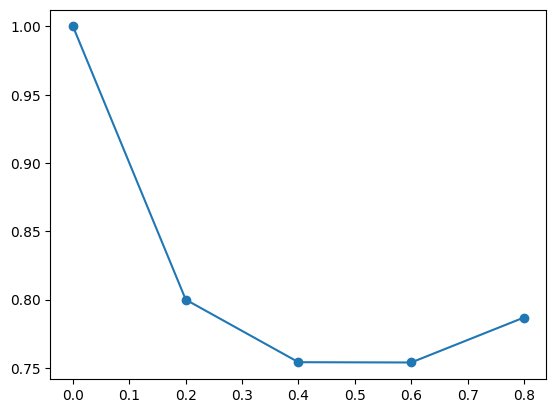

In [6]:
def f(x, y):
    return x - 2*y + 1

x, y = PreditorCorretor(f, 0, 0.8, 1, 0.2)

print('Preditor-Corretor: ', y)

# plotar o gráfico
plt.plot(x, y, 'o-')
plt.show()


# 2) Método de Adams-Bashforth-Moulton para um PVI com um sistema de duas EDO's

In [7]:
def PreditorCorretor2(f1, f2, x0, xf, y1_0, y2_0, h):
    '''
    f1: y'/y'' = f1(x, y)  
    f2: y'/y'' = f2(x, y)  
    y1_0: y1 inicial  
    y2_0: y2 inicial  
    x0: x inicial  
    xf: x final  
    h: passo (ex. 0.1)  
    '''
    # para salvar os x, y por iteração
    x = []
    y1 = []
    y2 = []

    x.append(x0)
    y1.append(y1_0)
    y2.append(y2_0)

    # calcular o primeiro y com euler
    x_euler, y1_euler = euler(f1, x0, xf, y1_0, h)
    x_euler, y2_euler = euler(f2, x0, xf, y2_0, h)

    x.append(x_euler[1])
    y1.append(y1_euler[1])
    y2.append(y2_euler[1])

    # de x1 a xf com passo h
    while x[-1] < xf:
        i = len(x) - 1
        # preditor
        y1_pred = round((y1[i] + (h/2)*(3*f1(x[i], y1[i]) - f1(x[i-1], y1[i-1]))), 4)
        y2_pred = round((y2[i] + (h/2)*(3*f2(x[i], y2[i]) - f2(x[i-1], y2[i-1]))), 4)
        # corretor, com 3 correções para cada yp
        for j in range(3):
            y1_corr = round((y1[i] + (h/12)*(5*f1(x[i] + h, y1_pred) + 8*f1(x[i], y1[i]) - f1(x[i-1], y1[i-1]))), 4)
            y2_corr = round((y2[i] + (h/12)*(5*f2(x[i] + h, y2_pred) + 8*f2(x[i], y2[i]) - f2(x[i-1], y2[i-1]))), 4)
            y1_pred = y1_corr
            y2_pred = y2_corr
        x.append(round((x[i] + h), 2))
        y1.append(y1_corr)
        y2.append(y2_corr)
    return x, y1, y2

Exemplo  
$$\begin{cases}
f_1 = y_1 - y_{2 + 1} \\
f_2 = y_1 - y_{2} \\
y_1(0) = 1 \\
y_2(0) = 1 \\
h = 0.2
\end{cases}$$

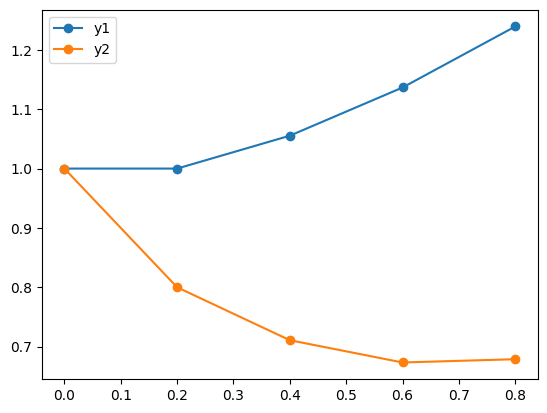

In [8]:
def f1(x, y):
    return x - y + 1

def f2(x, y):
    return x - y

x, y1, y2 = PreditorCorretor2(f1, f2, 0, 0.8, 1, 1, 0.2)

# plotar o gráfico
plt.plot(x, y1, 'o-', label='y1')
plt.plot(x, y2, 'o-', label='y2')
plt.legend()
plt.show()

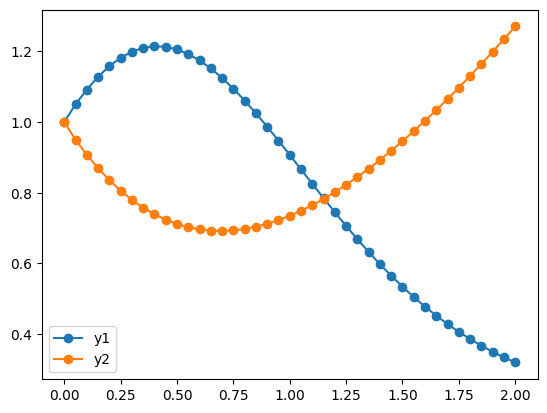

In [18]:
def f1(x, y):
    return x * -2*y + 1

def f2(x, y):
    return x - y

x, y1, y2 = PreditorCorretor2(f1, f2, 0, 2, 1, 1, 0.05)

# plotar o gráfico
plt.plot(x, y1, 'o-', label='y1')
plt.plot(x, y2, 'o-', label='y2')
plt.legend()
plt.show()

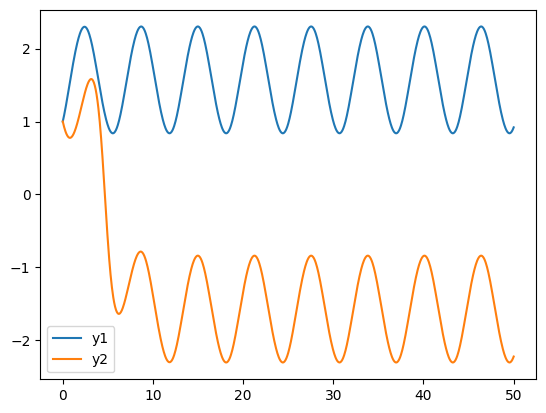

In [10]:
def f1(x, y):
    return np.sin(x) + np.cos(y)
def f2(x, y):
    return np.sin(x) - np.cos(y)

x, y1, y2 = PreditorCorretor2(f1, f2, 0, 50, 1, 1, 0.05)

# plotar o gráfico
plt.plot(x, y1, '-', label='y1')
plt.plot(x, y2, '-', label='y2')
plt.legend()
plt.show()